# Neural Network on MNIST Data

Run each cell in the notebook. The explanation of the cells are given on top respectively. Also, you need to have keras with tensorflow backend to load the dataset.

In [1]:
import numpy as np
import random
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras_team.keras.datasets import mnist

Using TensorFlow backend.


Downloading the Mnist data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Scaling the data so that values are between 0 and 1

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
x_train = x_train/255
x_test = x_test/255

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Creating the training and testing dataset alongwith setting the Y values to 0 or 1 depending on a condition. The condition here is last digit of VUNetId. My last digit is 1. So for the Y values of 1, new value is set to 1(true). Rest of them are set to 0(false). Also the 28x28 dataset is converted to a column vector 784x1.

In [4]:
X = x_train.reshape(60000, 784)  #Converting to column vector for each datapoint
X1 = X
Y = np.array(y_train == 1)
Y = 1*Y    #Setting values to 1 or 0 for training

test_X = x_test.reshape(10000,784)
test_X = test_X.transpose()
test_Y = np.array(y_test == 1)
test_Y = 1*test_Y         # Setting values to 1 or 0 for test


This is the forward propagation step of the hidden layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a ReLu or tanh function according to our wishes.

In [5]:
def forward_prop_hidden(W, b, data_X):
    Wt = W.transpose()
    intermediate = np.inner(Wt, data_X.transpose())
    Z = intermediate + b
    A = relu(Z)
    return A

This is the forward propagation step of the output layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a sigmoid function to make the value between 0 - 1

In [6]:
def forward_prop_output(W, b, data_X):
    Wt = W.transpose()
    intermediate = np.inner(Wt, data_X.transpose())
    Z = intermediate + b
    A = sigmoid(Z)
    return A

This is the backward propagation step. Here the required derivatives are calculated which will be later updated in further steps

In [7]:
def backward_prop_1(A1, m, W2, dZ2, data_X):
    dZ1 = np.inner(W2, dZ2.transpose())
    dZ1 = dZ1* relu_derivative(dZ1)
    dW1 = np.inner(data_X, dZ1)/m
    db1 = sum(dZ1)/m
    return dW1, db1

This is the backward propagation of output layer(Layer2)

In [8]:
def backward_prop_2(A2, A1, m, data_Y):
    dZ2 = A2 - data_Y
    dW2 = np.inner(dZ2, A1)/m
    db2 = sum(dZ2)/m
    return dW2, db2, dZ2

This is the sigmoid activation function used to map any real value between 0 and 1

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

This is the Rectified Linear Unit(ReLU) activation function

In [10]:
def relu(x):
    return np.maximum(0, x)

This is the derivative of the ReLU function

In [11]:
def relu_derivative(x):
    y = np.array(x > 0)
    y = 1*y
    return y

This is the tanh activation function

In [12]:
def tanh(x):
    return np.tanh(x)

This is the derivative of tanh function

In [13]:
def tanh_derivative(x):
    return 1/np.square(np.cosh(x))

Computes the cost function for all the training samples

In [14]:
def cost_function(A, m, data_Y):
    total_cost = -(1 / m) * np.sum(data_Y * np.log(A) + (1 - data_Y) * np.log(1 - A))
    return total_cost

Here the results are predicted. The W and b of model are taken as input. The values are predicted using test dataset and then using the actual values the accuracy is computed

In [15]:
def results(W1, b1, W2, b2, data_X, data_Y):
    W1t = W1.transpose()
    W2t = W2.transpose()
    A1 = forward_prop_hidden(W1, b1, data_X)
    A2 = forward_prop_output(W2, b2, A1)
    pred_Y = A2.transpose()
    pred_Y = np.around(pred_Y, decimals = 0)   #Rounding off the predicted value to 0 or 1
    accuracy = accuracy_score(data_Y, pred_Y)
    return accuracy

In [16]:
def neural_net():    
    alpha = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.05]   #set of learning rates to check from
    epochs = 1001
    max_cost = 0
    max_accuracy = 0
    alpha_max = 0
    h = 5            #hidden units
    for i in range(len(alpha)):
        train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2) # Splitting training data using 80:20 rule
        valid_X = valid_X.transpose()
        train_X = train_X.transpose()
        n, m = train_X.shape
        W1 = np.random.rand(n,h)     #Initializing W and b
        b1 = random.random()
        W2 = np.random.rand(h,1)
        b2 = random.random()
        for j in range(epochs):
            if(j%500 == 0):
                print('Epoch:', j)
            A1 = forward_prop_hidden(W1, b1, train_X)         #forward propagation through hidden layer
            A2 = forward_prop_output(W2, b2, A1)
            dW2, db2, dZ2 = backward_prop_2(A2, A1, m, train_Y)        #backward propagation through output layer
            dW1, db1 = backward_prop_1(A1, m, W2, dZ2, train_X)
            W1 = W1 - alpha[i]*dW1                    #Updating b and W
            b1 = b1 - alpha[i]*db1
            W2 = W2 - alpha[i]*dW2.transpose()
            b2 = b2 - alpha[i]*db2
        b1 = sum(b1)/m
        b2 = sum(b2)/m
        accuracy = results(W1, b1, W2, b2, valid_X, valid_Y)   #testing the accuracy using validation set
        if(accuracy >= max_accuracy):
            alpha_max = alpha[i]                     #finding the alpha for which accuracy was the maximum
            max_accuracy = accuracy
        print('Alpha:',alpha[i],'Accuracy:', accuracy)
    print( 'Max:',alpha_max)
    return alpha_max
alpha_max = neural_net()

Epoch: 0
Epoch: 500
Epoch: 1000
Alpha: 0.0001 Accuracy: 0.8868333333333334
Epoch: 0
Epoch: 500
Epoch: 1000
Alpha: 0.001 Accuracy: 0.8945
Epoch: 0
Epoch: 500
Epoch: 1000
Alpha: 0.005 Accuracy: 0.9133333333333333
Epoch: 0
Epoch: 500
Epoch: 1000
Alpha: 0.01 Accuracy: 0.9718333333333333
Epoch: 0
Epoch: 500
Epoch: 1000
Alpha: 0.1 Accuracy: 0.15658333333333332
Epoch: 0
Epoch: 500
Epoch: 1000
Alpha: 0.05 Accuracy: 0.98125
Max: 0.05


Here, we calculate the cost function for each iteration using the learning rate which we had obtained earlier. We run this on the entire training set. After obatining values of W and b, we calculate the training and test error.

In [17]:
X = X.transpose()
n, m = X.shape
h = 5  #no of hidden units
W1 = np.random.rand(n,h)     #Initializing W and b
b1 = random.random()
W2 = np.random.rand(h,1)
b2 = random.random()
epochs = 2001
cost_array = []
J_arr =[]
count = 0
for j in range(epochs):
    if(j%500 == 0):
        print('Epoch:', j)
    A1 = forward_prop_hidden(W1, b1, X)
    A2 = forward_prop_output(W2, b2, A1)
    dW2, db2, dZ2 = backward_prop_2(A2, A1, m, Y)
    dW1, db1 = backward_prop_1(A1, m, W2, dZ2, X)
    W1 = W1 - alpha_max*dW1                    #Updating b and W
    b1 = b1 - alpha_max*db1
    W2 = W2 - alpha_max*dW2.transpose()
    b2 = b2 - alpha_max*db2
    total_cost = cost_function(A2, m, Y)
    cost_array.append(total_cost)    # Storing the value of cost function
    J_arr.append(count)
    count+= 1
b1 = sum(b1)/m
b2 = sum(b2)/m
final_accuracy_test = results(W1, b1, W2, b2, test_X, test_Y)*100    # Calculating the training and test accuracy
final_accuracy_train = results(W1, b1, W2, b2, X1.transpose(), Y)*100
print('Training error:', str(100-final_accuracy_train),'%')
print('Test error:', str(100-final_accuracy_test),'%')

Epoch: 0


C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Epoch: 500
Epoch: 1000
Epoch: 1500
Epoch: 2000
Training error: 2.541666666666657 %
Test error: 2.3800000000000097 %


Plotting the cost function as a function of the iterations. We can see that the cost function decreases very fast initially but after a certain number of iterations the rate of decrease is much less which indicates that our neural network is  converging hence the error is reducing asymptotically.

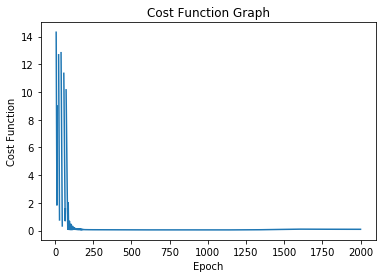

In [18]:
plt.title('Cost Function Graph')
plt.xlabel('Epoch')
plt.ylabel('Cost Function')
plt.plot(J_arr, cost_array)
plt.show()

Here, you can check any individual image. You can load the particular image from the test dataset by changing the array index. The program will tell whether the number is 1 or not

In [ ]:
x1 = x_test[2]
plt.imshow(x1, interpolation='nearest', cmap = 'gray')
plt.show()
x1 = x1.reshape(784, 1)
A1 = forward_prop_hidden(W1, b1, x1)
A2 = forward_prop_output(W2, b2, A1)
if (A2<0.5):
    print('This is not 1')
else:
    print('This is 1')


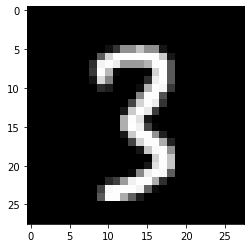

This is not 1


In [123]:
x1 = x_test[2566]
plt.imshow(x1, interpolation='nearest', cmap = 'gray')
plt.show()
x1 = x1.reshape(784, 1)
A1 = forward_prop_hidden(W1, b1, x1)
A2 = forward_prop_output(W2, b2, A1)
if (A2<0.5):
    print('This is not 1')
else:
    print('This is 1')

Higher learning rate means the regression learns faster, i.e. it converges faster. The accuracy at end of 1000 epochs may not show significant changes on changing the learning rate because in this small dataset, having smaller alphas also makes the program converge.
I have also checked the impact of different no of hidden layers by changing the value of h. It changes the accuracy but not significantly. It decreases the accuracy a bit. But it might also increase it. I found two different values when I ran the code twice with different hidden units. Anyway, the change was insignificant and might have been caused by the initial values of W and b.
Also, I have checked the neural network using two different activation function tanh and ReLU in the hidden layer. To check it now, we need to change the name in forward propagation step and the derivative in backward propagation step. After checking I found that ReLU performs better than tanh for same alpha and same number of epochs(2000) and hidden layer.